In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import fitsio as ft

In [2]:
import pandas as pd

In [3]:
d = pd.read_hdf('/home/mehdi/data/templates/dr9/pixweight_dark_dr9m_nside256.h5')
d.columns

Index(['stardens', 'ebv', 'psfdepth_g', 'psfdepth_r', 'psfdepth_z',
       'galdepth_g', 'galdepth_r', 'galdepth_z', 'psfsize_g', 'psfsize_r',
       'psfsize_z', 'psfdepth_w1', 'psfdepth_w2', 'loghi', 'ccdskymag_mean_g',
       'ccdskymag_mean_r', 'ccdskymag_mean_z', 'fwhm_mean_g', 'fwhm_mean_r',
       'fwhm_mean_z', 'fwhm_min_g', 'fwhm_min_r', 'fwhm_min_z', 'fwhm_max_g',
       'fwhm_max_r', 'fwhm_max_z', 'depth_total_g', 'depth_total_r',
       'depth_total_z', 'mjd_mean_g', 'mjd_mean_r', 'mjd_mean_z', 'mjd_min_g',
       'mjd_min_r', 'mjd_min_z', 'mjd_max_g', 'mjd_max_r', 'mjd_max_z',
       'airmass_mean_g', 'airmass_mean_r', 'airmass_mean_z', 'exptime_total_g',
       'exptime_total_r', 'exptime_total_z', 'lognstar'],
      dtype='object')

In [9]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.utils import hpix2radec, shiftra

In [8]:
is_good = d.dropna().index.values

In [15]:
is_good

array([  1672,   1673,   1674, ..., 757952, 757953, 757954])

In [35]:
hpix = np.arange(d.shape[0])
ix = np.random.choice(is_good, 20000, replace=False)
ra, dec = hpix2radec(256, hpix[ix])

Text(0, 0.5, 'DEC [deg]')

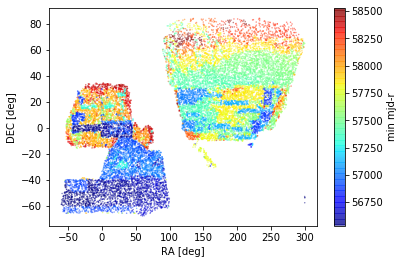

In [36]:
plt.scatter(shiftra(ra), dec, 1, marker='.', c=d.iloc[ix]['mjd_min_r'], cmap=plt.cm.jet, alpha=0.5)
cbar = plt.colorbar()
cbar.set_label('min mjd-r')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

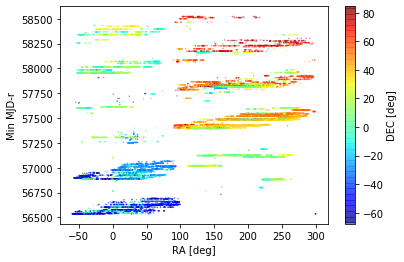

In [39]:
plt.scatter(shiftra(ra), d.iloc[ix]['mjd_min_r'], 1., marker='.', c=dec, cmap=plt.cm.jet, alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('Min MJD-r')
cbar = plt.colorbar()
cbar.set_label('DEC [deg]')